In [12]:
from metadata import SymbolStorage

ss = SymbolStorage()
df = ss.get_dataframe()
df.matter.unique()

array(['P-Process', 'L-Piping', 'H-HVAC', 'T-telecom', 'N-Structural',
       'R-Mechanical', 'E-Electro', 'J-Instrument', 'S-Safety'],
      dtype=object)

In [2]:
df

,name,family,description,matter
0,STPL001,Line Symbols,HEADER DRAWING,P-Process
1,STPL002,Line Symbols,TWO WAY DRAWING REFERENCE,P-Process
2,STPL004,Line Symbols,OFFPAGE CONNECTOR FLOW RIGHT,P-Process
3,STPL005,Line Symbols,OFFPAGE CONNNECTOR FLOW LEFT,P-Process
4,STPL024,Line Symbols,FULL HEADER DRAWING,P-Process
...,...,...,...,...
1207,STSF014,Fire fighting equipment,WHEELED EXTINGUISHER,S-Safety
1208,STSF015,Fire fighting equipment,BREATHING APPARATUS,S-Safety
1209,STSP007,Passive fire protetion,FIRE PROOFING MATERIAL,S-Safety
1210,STSP008,Passive fire protetion,FIRE PROOFING MATERIAL,S-Safety


In [ ]:
pd.read_csv()

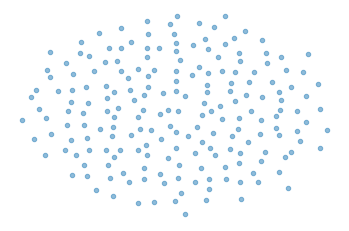

In [33]:
from fa2 import ForceAtlas2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,
                        # Performance
                        jitterTolerance=0.1,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED
                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=0.5,
                        # Log
                        verbose=False)
G = np.identity(200)
positions = forceatlas2.forceatlas2(G, pos=None, iterations=50)
# To plot the graph
networkx_graph = nx.from_numpy_matrix(G)
nx.draw_networkx(networkx_graph, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()

In [34]:
#[np.max(positions),np.min(positions)]
x,y = zip(*positions)
x_range = (np.max(x)-min(x))
y_range = (np.max(y)-min(y))
dx,dy = (5000-100,3500-100)
print(x_range, y_range)
x_ratio = dx/x_range
y_ratio = dy/y_range
x = (np.array(x)+np.abs(min(x))) * x_ratio + 50
y = (np.array(y)+np.abs(min(y))) * y_ratio + 50
max(x),min(x),max(y),min(y)
positions = list(zip(x,y))
positions[:10]

147.99810163430135 151.26978755260114


[(1580.9104904426763, 1863.6744647163557),
 (917.2815814074524, 1068.8240197144937),
 (2161.558139660314, 251.0330769435588),
 (4835.077585338726, 1192.2780968040422),
 (3023.3852392128847, 2267.6103833157763),
 (1506.4715365190057, 358.25252419809243),
 (2933.9708369209748, 1747.6000210753361),
 (3849.323035593003, 602.494173042498),
 (1639.7323545779727, 2905.0319749029886),
 (2076.510931268512, 3145.18694812653)]